# Der MNIST-Datensatz

Der **MNIST** (Modified National Institute of Standards) Datensatz ist ein Datensatz mit 70.000 Bildern von handgeschriebenen Ziffern. Dieser Datensatz wird weltweit als Standarddatensatz genutzt, um zu prüfen wie gut Machine Learning Verfahren die Bilderkennung beherrschen. Darüber hinaus zeigt es ein Anwendungbeispiel bei dem man mit herkömmlichen Programmiermethoden schnell an Grenzen stößt, das aber mit Künstlichen Neuronalen Netzen sehr gut lösbar ist.

<td> <img src="MNIST_Ziffern.png" alt="Drawing" style="width: 400px; float: left;"/> </td>



Bevor wir selbst ein KNN aufsetzen können, das anhand der MNIST Daten lernen und hinterher die Ziffern auf den Bildern erkennen kann, müssen wir erst einmal schauen, wie der MNIST Datensatz überhaupt aussieht. 

In diesem Notebook werden daher einige Hilfsfunktionen zum Einlesen und zum Plotten der Bilder zur Verfügung gestellt. In den folgenden Kapiteln werden wir dann immer wieder auf diese Hilfsfunktionen zugrückgreifen.

## Daten einlesen
Zunächste lesen wir einmal einen kleinen Teil-Datensatz mit nur 100 Bildern von der Festplatte ein.

In [1]:
#Import der Bibliotheken
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [2]:
# CSV-Datei öffnen und Inhalte in eine Liste laden
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_lines = data_file.readlines()
data_file.close()

In [3]:
# Anzahl der Einträge checken
len(data_lines)

100

Jeder der 100 Einträge in der Datenliste stellt ein Bild einer handschriftlichen Ziffer dar, wie oben gezeigt.

In [4]:
# Ein Bild näher betrachten
pic_nr = 7

In [5]:
# Eintrag des Datensatzes ansehen
print( data_lines[pic_nr] )
print ( type(data_lines[pic_nr]) )


3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,243,252,252,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,189,252,252,252,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,212,247,252,252,252,204,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,125,193,193,193,253,252,252,252,238,102,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,222,252,252,252,252,253,252,252

Der Eintrag aus <code>data_list</code> ist ein langer String der ganz viele **Zahlen zwischen 0 und 255** enthält. Um genau zu sein sind es **785 Zahlen**. Damit man sieht, dass es sich hier um ein Bild handelt muss man noch ein paar Schritte erledigen.

## Daten analysieren
Erstmal machen wir aus dem langen String eine Liste mit 785 Einträgen:

In [6]:
#String in Liste umwandeln
pic_values = data_lines[pic_nr].split(',')
print( pic_values )

['3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '38', '43', '105', '255', '253', '253', '253', '253', '253', '174', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '43', '139', '224', '226', '252', '253', '252', '252', '252', '252', '252', '252', '158', '

In [7]:
print( len(pic_values ) )
print( 28*28 )

785
784


Der erste Eintrag von den 785 ist das Label des Bildes, d. h. er sagt welche Zahl dort abgebildet ist. Unser Bild soll also eine handschriftliche **3** zeigen. 

Die weiteren 784 Werte stellen das Bild dar. Um zu sehen, wie das funktioniert, müssen wir die Daten aber noch etwas weiter verarbeiten. Es gilt $28\cdot 28 = 784$, d. h. wir können die Zahlen in einer **28x28 - Matrix** darstellen.

Eine Matrix kann man in Python am besten mit der <code>numpy</code> Bibliothek erzeugen. Den ersten Zahlenwert wollen wir nicht mit einbeziehen und betrachten deshalb <code>pic_values[1:]</code> und stellen die restlichen 784 Zahlenwerten als **28x28**-Matrix dar. 

In [ ]:
# Daten des ersten Datensatzes nehmen, als 28x28-Array umformtieren und plotten
# asarray: Konvertiert den Input zu einem Array, wobei der Typ float verwendet wird,
# dieser Typ wird im Folgenden benötigt, um die Werte mit matplotlib.imshow zu plotten
pic_array = np.asarray(pic_values[1:],dtype=np.float32).reshape((28,28)) 

# ASCII-Ausgabe der Bilddaten
for z in range(28):
    for s in range(28):
        # Ausgabe der Werte mit 3 Stellen, rechtsbündig
        print (str(int(pic_array[z][s])).rjust(3), end=' ')
    print()


  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252 252 252 252 158  14   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252 252 252  59   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 132 132 189 252 252 252 252  59   0 

Im der ASCII-Ausgabe des Array ist schon zu erkennen, dass es sich tatsächlich um ein Bild handelt.

## Daten als Bild darstellen
Jetzt wollen wir die Daten aber auch noch als Bild darstellen. Dafür gibt es den <code>imshow</code> Befehl aus der Bibliothek <code>matplotlib</code>. Durch den Parameter `cmap = 'Greys'` werden die Zahlen aus dem Array als Grauwerte interpretiert, wobei der Wert 0 ein weißes Pixel erzeugt, der Wert 255 ein schwarzes Pixel und die Werte dazwischen verschieden Abstufungen von grauen Pixeln.

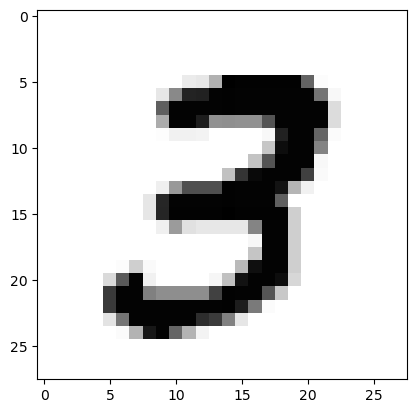

In [9]:
imshow(pic_array, cmap='Greys')

Hier noch einmal zusammenfassend alle Schritte, um einen Datensatz als Bild dastzustellen:

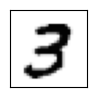

In [10]:
#Schaue dir verschiedene Zahlen aus dem Datensatz an 
pic_nr=7
pic_values = data_lines[pic_nr].split(',')
pic_array = np.asarray(pic_values[1:],dtype=np.float32).reshape((28,28))
plt.figure(figsize=(1,1))
plt.xticks([])
plt.yticks([])
plt.imshow(pic_array, cmap='Greys')

## Funktionen zum Plotten der Bilder
Abschließend definieren wir noch zwei Funktionen, um die einglesenen String-Daten direkt plotten zu können.

In [11]:
# data_line ist eine Zeile aus dem Datensatz,
# also ein String der Länge 1+28x28 = 1+784
def plot_pic(data_line):
    pic_values = data_line.split(',')
    image = np.asarray(pic_values[1:],dtype=np.float32).reshape((28,28))
    fig, axes = plt.subplots(figsize=(1,1))
    axes.matshow(image, cmap=plt.cm.binary)
    axes.set_xticks([])
    axes.set_yticks([])
    plt.show()

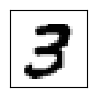

In [12]:
plot_pic(data_lines[7])

In [13]:
# data_lines ist eine Liste von Zeilen aus dem Datensatz,
# also eine Liste von Strings der Länge 1+28x28 = 1+784
def plot_pics(data_lines):
    images=[]
    for i in range(len(data_lines)):
        pics_values = data_lines[i].split(',')
        images.append(np.asarray(pics_values[1:],dtype=np.float32).reshape((28,28)))
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.matshow(images[j].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

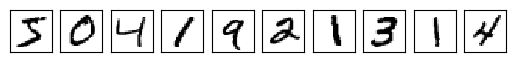

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [14]:
plot_pics(data_lines[0:10])
print( [int(data_lines[i][0]) for i in range(10)] )

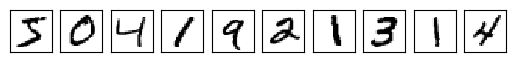

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


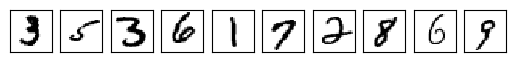

[3, 5, 3, 6, 1, 7, 2, 8, 6, 9]


In [15]:
for i in range(2):
    plot_pics(data_lines[i*10:(i+1)*10])
    print( [int(data_lines[i*10+j][0]) for j in range(10)] )

# Erzeugen einer Matrix von Bildern
Manchmal ist es nützlich, die Bilder platzsparend in einer Matrix darzustellen. Deshalb schauen wir uns auch noch eine Möglichkeite an, wie man dies tun kann.

In [16]:
data_file = open("mnist_dataset/mnist_train_1000.csv", 'r')
data_lines = data_file.readlines()
data_file.close()

In [17]:
# Erzeugt eine 10x10-Matrix der ersten 100 Bilder des Triainingssatzes:
def plot_100_pics_as_matrix(data_lines):
    images=[]
    for i in range(len(data_lines)):
        pics_values = data_lines[i].split(',')
        images.append(np.asarray(pics_values[1:],dtype=np.float32).reshape((28,28)))
    fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(5, 5))
    for i in range(10):
        for j in range(10):
            axes[i,j].matshow(images[i*10+j], cmap = plt.cm.binary)
            axes[i, j].axis('off')
    plt.show()

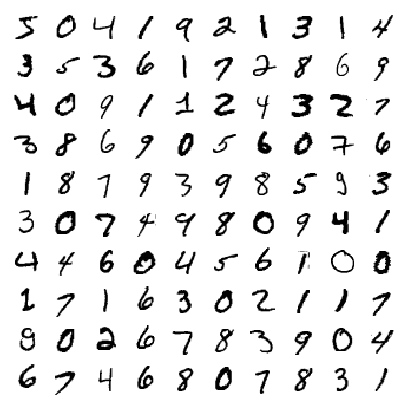

In [18]:
plot_100_pics_as_matrix(data_lines[0:100])